### Read 
The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease.

choose 3 features (bgr, rc, wc) run the PCA with n_components=2. 

### Data Set Information:

We use the following representation to collect the dataset
age - age, 
bp - blood pressure, 
sg - specific gravity, 
al - albumin, 
su - sugar, 
rbc - red blood cells, 
pc - pus cell, 
pcc - pus cell clumps, 
ba - bacteria, 
bgr - blood glucose random, 
bu - blood urea, 
sc - serum creatinine, 
sod - sodium, 
pot - potassium, 
hemo - hemoglobin, 
pcv - packed cell volume, 
wc - white blood cell count, 
rc - red blood cell count, 
htn - hypertension, 
dm - diabetes mellitus, 
cad - coronary artery disease, 
appet - appetite, 
pe - pedal edema, 
ane - anemia, 
class - class

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [227]:
disease=pd.read_csv('kidney_disease.csv')
disease.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [228]:
data=pd.DataFrame(disease,columns=['wc','rc','bgr','classification'])
data.head()

,wc,rc,bgr,classification
0,7800,5.2,121.0,ckd
1,6000,NaN,NaN,ckd
2,7500,NaN,423.0,ckd
3,6700,3.9,117.0,ckd
4,7300,4.6,106.0,ckd


In [229]:
data.dtypes

wc                 object
rc                 object
bgr               float64
classification     object
dtype: object

In [230]:
data.shape

(400, 4)

In [231]:
data.isna().sum()

wc                105
rc                130
bgr                44
classification      0
dtype: int64

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
wc                295 non-null object
rc                270 non-null object
bgr               356 non-null float64
classification    400 non-null object
dtypes: float64(1), object(3)
memory usage: 12.6+ KB


In [233]:
data['bgr'].fillna(data['bgr'].mean(),inplace=True)

In [234]:
data.dropna(inplace=True)

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 399
Data columns (total 4 columns):
wc                269 non-null object
rc                269 non-null object
bgr               269 non-null float64
classification    269 non-null object
dtypes: float64(1), object(3)
memory usage: 10.5+ KB


In [236]:
data.head()

,wc,rc,bgr,classification
0,7800,5.2,121.0,ckd
3,6700,3.9,117.0,ckd
4,7300,4.6,106.0,ckd
5,7800,4.4,74.0,ckd
7,6900,5,410.0,ckd


In [237]:
data.rc

0      5.2
3      3.9
4      4.6
5      4.4
7        5
8      4.0
9      3.7
11     3.8
12     3.4
14     2.6
15     2.8
18     4.3
19     3.7
20     3.2
21     3.6
22     3.4
24     4.6
25     3.7
26       4
27     4.1
31       4
32     4.0
35     4.9
37     2.5
39     4.2
40     4.1
42     4.5
43     3.1
46     4.7
48     3.5
      ... 
370    5.4
371    5.0
372    5.5
373    4.9
374    6.4
375    5.6
376    5.2
377    4.8
378    5.5
379    5.7
380    4.9
381    5.9
382    6.5
383    5.0
384    4.5
385    5.1
386    6.5
387    5.2
388    6.4
389    5.8
390    5.3
391    6.3
392    5.5
393    5.4
394    4.6
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rc, Length: 269, dtype: object

In [238]:
data.replace("	?",np.nan,inplace=True)

In [239]:
data.rc.unique()

array(['5.2', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4', '2.6',
       '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2', '4.5',
       '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3', '2.9',
       '2.7', '8.0', '3.3', '3.0', '2.4', '4.8', nan, '5.4', '6.1', '6.2',
       '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [240]:
data.isna().sum()

wc                0
rc                1
bgr               0
classification    0
dtype: int64

In [241]:
data.dropna(inplace=True)

In [242]:
data['rc']=pd.to_numeric(data['rc'])

In [243]:
data['wc']=pd.to_numeric(data['wc'],downcast='float')

In [244]:
data.dtypes

wc                float32
rc                float64
bgr               float64
classification     object
dtype: object

In [245]:
data.isna().sum()

wc                0
rc                0
bgr               0
classification    0
dtype: int64

In [246]:
data.shape

(268, 4)

In [247]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [248]:
data['classification'].replace('ckd\t','ckd', inplace=True)
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [249]:
data.classification.value_counts()

notckd    143
ckd       125
Name: classification, dtype: int64

In [250]:
classification=pd.get_dummies(data['classification'],drop_first=True)
classification.tail(10)

,notckd
390,1
391,1
392,1
393,1
394,1
395,1
396,1
397,1
398,1
399,1


In [251]:
data=pd.concat([data,classification],axis=1)

In [252]:
data.dtypes

wc                float32
rc                float64
bgr               float64
classification     object
notckd              uint8
dtype: object

In [253]:
data.head()

,wc,rc,bgr,classification,notckd
0,7800.0,5.2,121.0,ckd,0
3,6700.0,3.9,117.0,ckd,0
4,7300.0,4.6,106.0,ckd,0
5,7800.0,4.4,74.0,ckd,0
7,6900.0,5.0,410.0,ckd,0


In [254]:
data.drop(['classification'],axis=1,inplace=True)
data.head()

,wc,rc,bgr,notckd
0,7800.0,5.2,121.0,0
3,6700.0,3.9,117.0,0
4,7300.0,4.6,106.0,0
5,7800.0,4.4,74.0,0
7,6900.0,5.0,410.0,0


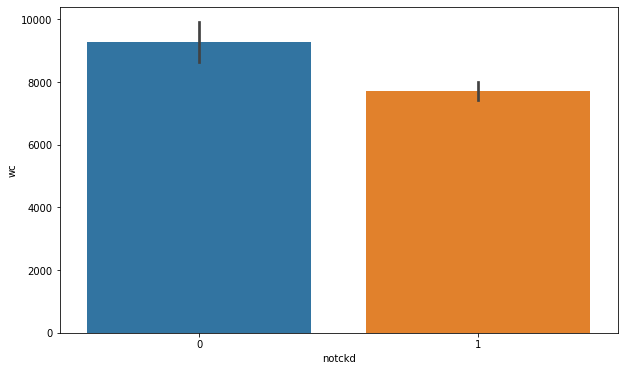

In [255]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'notckd', y = 'wc', data = data)

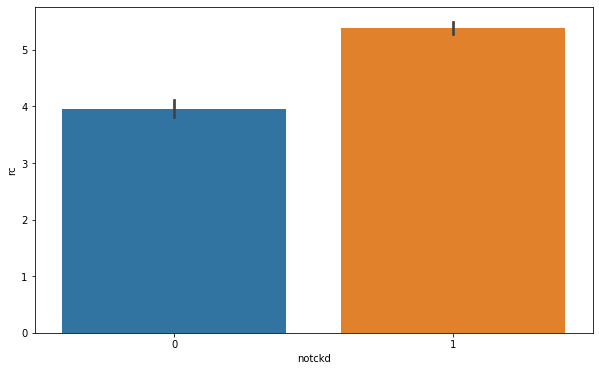

In [256]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'notckd', y = 'rc', data = data)

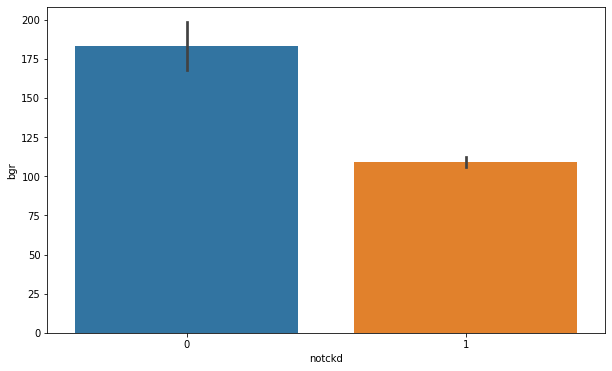

In [257]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'notckd', y = 'bgr', data = data)

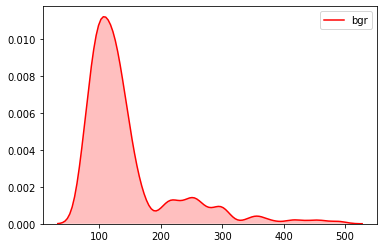

In [258]:
sns.kdeplot(data['bgr'],shade=True,color="red")

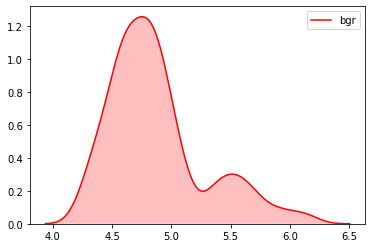

In [259]:
abs(data.skew())
data['bgr'] = np.log(data['bgr'])
sns.kdeplot(data['bgr'],shade=True,color="red")

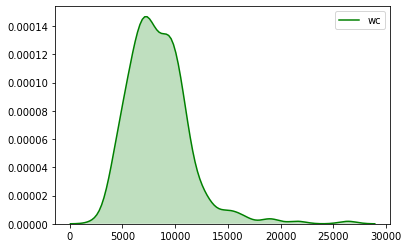

In [260]:
sns.kdeplot(data['wc'],shade=True,color="green")

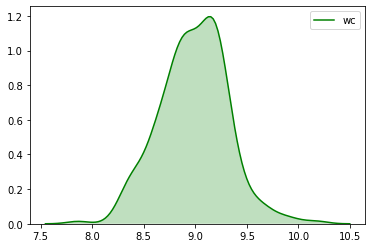

In [261]:
abs(data.skew())
data['wc'] = np.log(data['wc'])
sns.kdeplot(data['wc'],shade=True,color="green")

### Train, Test Split and Data Preprocessing

In [262]:
X=data.drop(['notckd'],axis=1)
y=data['notckd']

In [263]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [264]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [265]:

pd.DataFrame(data=X_train).head()

,0,1,2
0,0.833114,0.770790,-0.444527
1,0.082968,-0.209617,0.239621
2,-0.967658,0.280587,0.632927
3,-0.440753,0.574709,-0.187927
4,0.833114,1.359034,0.307543


In [266]:
pca=PCA(n_components=2)

In [267]:
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [268]:
pca.n_components_

2

In [269]:
X_train.shape

(214, 2)

In [270]:
data[['notckd']].head()

,notckd
0,0
3,0
4,0
5,0
7,0


In [271]:
model=LogisticRegression()

In [272]:
model.fit(X_train,y_train)

C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [273]:
predictions=model.predict(X_test)

In [274]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_test, predictions))

Accuracy:  0.9444444444444444
